# Project: forecasting model:linear regression
## Name: QUIN FABROS
### Date: 04/01/2024

In [9]:
# Variables in order:
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft. #categorical 
# INDUS    proportion of non-retail business acres per town categorical
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) #missing value- categorical
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
#source website:
#1: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
#2: https://lib.stat.cmu.edu/datasets/boston

In [48]:
import pandas as pd
import requests

# Define the URL of the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Fetch the raw text content of the dataset
response = requests.get(data_url) #read it as text
data_lines = response.text.splitlines() #split the lines

# Initialize empty list to store rows
rows = []

# Iterate through data lines in steps of 2
for i in range(22, len(data_lines), 2):
    # Split line by whitespace
    line_values1 = data_lines[i].split() #split the 1st row for first 11 columns
    line_values2 = data_lines[i+1].split() #split the 2nd row for 12,13,14th columns
    
    # Combine two lines into one row
    combined_values = line_values1 + line_values2 #merge the whole 14 columns together (1st and 2nd rows) together

    # Append the combined values as a new row
    rows.append(combined_values) #added the new combined columns as a new added line in the last line

# Create DataFrame
raw_df = pd.DataFrame(rows, columns=column_names)

# Display the loaded DataFrame
print(raw_df)

        CRIM     ZN   INDUS CHAS     NOX      RM    AGE     DIS RAD    TAX  \
0    0.00632  18.00   2.310    0  0.5380  6.5750  65.20  4.0900   1  296.0   
1    0.02731   0.00   7.070    0  0.4690  6.4210  78.90  4.9671   2  242.0   
2    0.02729   0.00   7.070    0  0.4690  7.1850  61.10  4.9671   2  242.0   
3    0.03237   0.00   2.180    0  0.4580  6.9980  45.80  6.0622   3  222.0   
4    0.06905   0.00   2.180    0  0.4580  7.1470  54.20  6.0622   3  222.0   
..       ...    ...     ...  ...     ...     ...    ...     ...  ..    ...   
501  0.06263   0.00  11.930    0  0.5730  6.5930  69.10  2.4786   1  273.0   
502  0.04527   0.00  11.930    0  0.5730  6.1200  76.70  2.2875   1  273.0   
503  0.06076   0.00  11.930    0  0.5730  6.9760  91.00  2.1675   1  273.0   
504  0.10959   0.00  11.930    0  0.5730  6.7940  89.30  2.3889   1  273.0   
505  0.04741   0.00  11.930    0  0.5730  6.0300  80.80  2.5050   1  273.0   

    PTRATIO       B LSTAT   MEDV  
0     15.30  396.90  4.98  2

In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [ ]:
#Change the type from object to float 

In [ ]:
#feature 1: crime

In [19]:
raw_df['CRIM']= raw_df['CRIM'].astype(float)

In [20]:
raw_df.describe()

,CRIM
count,506.000000
mean,3.613524
std,8.601545
min,0.006320
25%,0.082045
50%,0.256510
75%,3.677083
max,88.976200


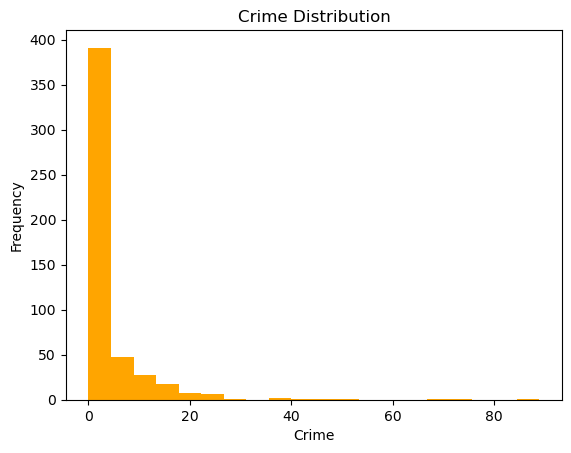

In [23]:
#distribution
import matplotlib.pyplot as plt
plt.hist(raw_df['CRIM'], bins=20, color='orange')
plt.xlabel('Crime')
plt.ylabel('Frequency')
plt.title('Crime Distribution')
plt.show()

In [24]:
#feature 2:Zone-  proportion of residential land zoned for lots over 25,000 sq.ft.

In [26]:
raw_df['ZN']=raw_df['ZN'].astype('category')

In [28]:
raw_df.describe()

,CRIM
count,506.000000
mean,3.613524
std,8.601545
min,0.006320
25%,0.082045
50%,0.256510
75%,3.677083
max,88.976200


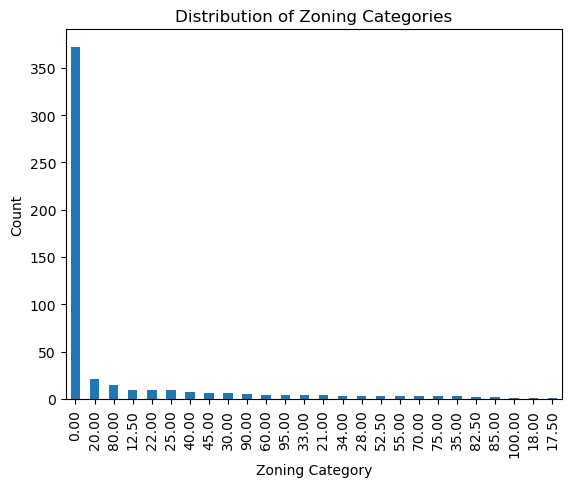

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `df` with a column named 'ZN' (replace with actual names)
raw_df['ZN'].value_counts().plot(kind='bar')  # Plot value counts as a bar chart
plt.xlabel('Zoning Category')
plt.ylabel('Count')
plt.title('Distribution of Zoning Categories')
plt.show()

In [ ]:
#feature 3: INDUS-proportion of non-retail business acres per town categorical


In [30]:
raw_df['INDUS']=raw_df['INDUS'].astype('float')

In [31]:
raw_df.describe()

,CRIM,INDUS
count,506.000000,506.000000
mean,3.613524,11.136779
std,8.601545,6.860353
min,0.006320,0.460000
25%,0.082045,5.190000
50%,0.256510,9.690000
75%,3.677083,18.100000
max,88.976200,27.740000


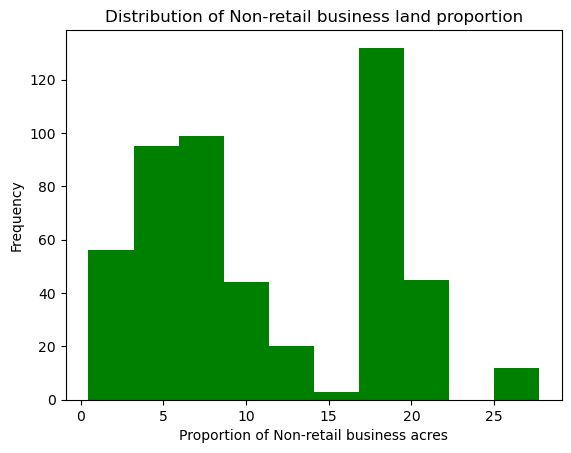

In [35]:
plt.hist(raw_df['INDUS'], color='green')
plt.xlabel('Proportion of Non-retail business acres')
plt.ylabel('Frequency')
plt.title('Distribution of Non-retail business land proportion')
plt.show()

In [ ]:
#feature 4: # CHAS-Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) #missing value- categorical


In [7]:
# Convert CHAS to a categorical type
raw_df['CHAS'] = raw_df['CHAS'].astype('category')


In [6]:
# Get the description for CHAS
print(raw_df['CHAS'].describe())

count     506
unique      2
top         0
freq      471
Name: CHAS, dtype: object


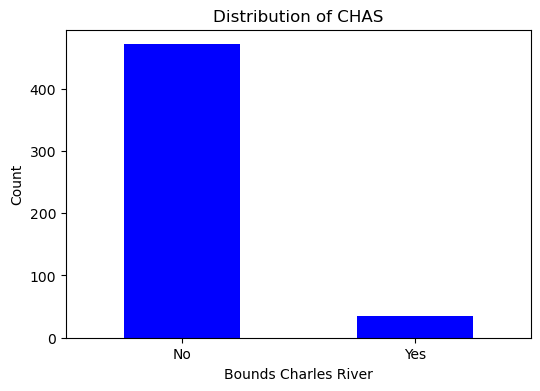

In [9]:
import matplotlib.pyplot as plt


# Plot the distribution of CHAS
plt.figure(figsize=(6, 4))
raw_df['CHAS'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Bounds Charles River')
plt.ylabel('Count')
plt.title('Distribution of CHAS')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)  # Assuming 0 = No, 1 = Yes
plt.show()


In [10]:
#feat5:      nitric oxides concentration (parts per 10 million)

raw_df['NOX'] = raw_df['NOX'].astype(float)



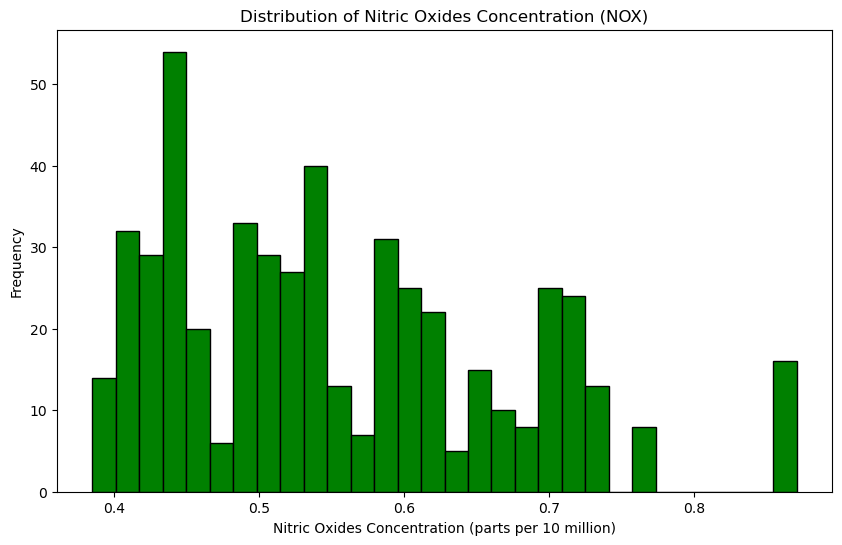

In [11]:
# Assuming you have matplotlib imported as plt and your DataFrame is named raw_df
plt.figure(figsize=(10, 6))  # Optional: You can set the figure size
plt.hist(raw_df['NOX'], bins=30, color='green', edgecolor='black')  # You can adjust the number of bins
plt.title('Distribution of Nitric Oxides Concentration (NOX)')
plt.xlabel('Nitric Oxides Concentration (parts per 10 million)')
plt.ylabel('Frequency')
plt.show()

#25 ppm normal 

In [12]:
# feat 6: RM       average number of rooms per dwelling
# Convert all columns to the appropriate numeric type.
raw_df = raw_df.apply(pd.to_numeric, errors='coerce')

# argument passed as 'null' or Nan (passed or ignored ) will return the good input

In [13]:
# Confirm that the DataFrame has been created and the types are correct.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


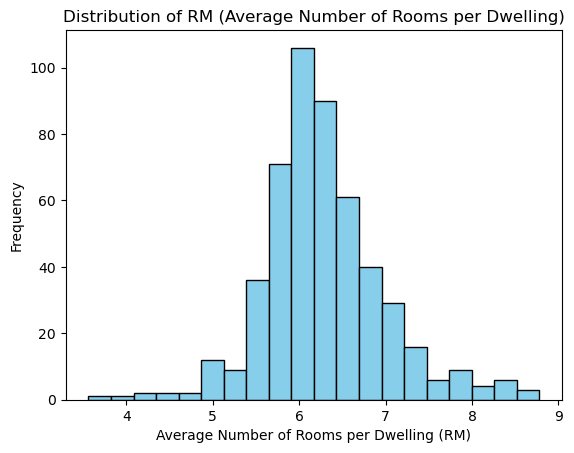

In [14]:
# Plotting the histogram for 'RM'
# We can now plot the histogram for the RM variable.
plt.hist(raw_df['RM'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Frequency')
plt.title('Distribution of RM (Average Number of Rooms per Dwelling)')
plt.show()

In [ ]:
#feat 6: AGE      proportion of owner-occupied units built prior to 1940

In [19]:
# Define a function to parse the data lines into records
def parse_data_lines(data_lines):
    # Since the data_lines contains header information in the first 22 lines,
    # we start reading data from the 23rd line onwards (index 22)
    data_records = []
    for i in range(22, len(data_lines), 2):
        # The dataset's format has one row split across two lines
        # First line contains the first 13 features
        # Second line contains the 14th feature and the target variable
        first_line = data_lines[i].split()
        second_line = data_lines[i+1].split()
        # Combine both lines to form a full record and convert strings to appropriate float values
        full_record = [float(val) for val in first_line + second_line]
        data_records.append(full_record)
    return data_records

# Parse the data lines into records
data_records = parse_data_lines(data_lines)

# Convert the records into a DataFrame
df = pd.DataFrame(data_records, columns=column_names)

# Convert 'AGE' to numeric type if it's not already
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')


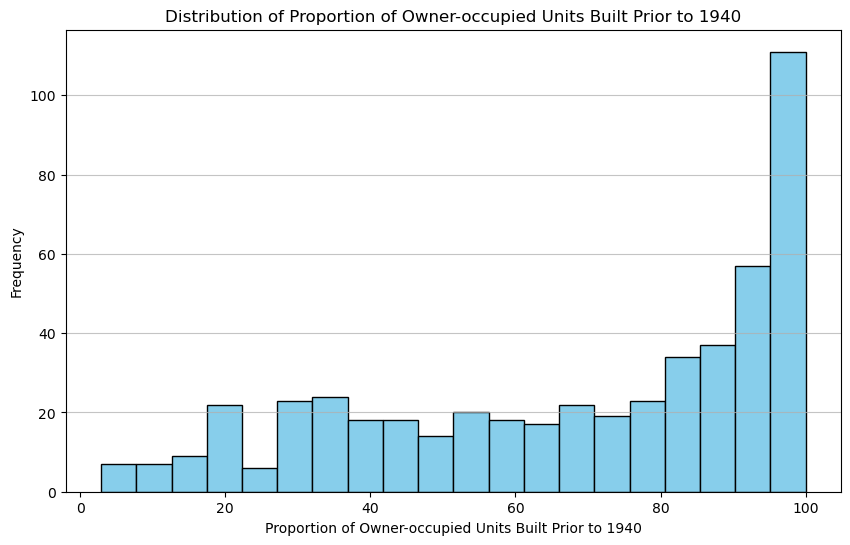

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Proportion of Owner-occupied Units Built Prior to 1940')
plt.xlabel('Proportion of Owner-occupied Units Built Prior to 1940')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

In [ ]:
#feature 6 DIS      weighted distances to five Boston employment centres

In [29]:
# Convert 'DIS' to float
df['DIS'] = df['DIS'].astype(float)

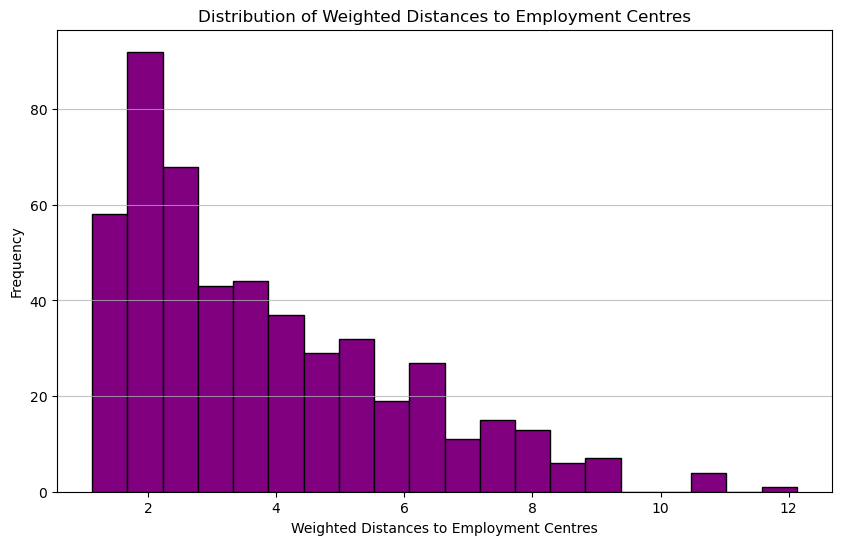

In [22]:


# Plot the distribution for 'DIS'
plt.figure(figsize=(10, 6))
plt.hist(df['DIS'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Weighted Distances to Employment Centres')
plt.ylabel('Frequency')
plt.title('Distribution of Weighted Distances to Employment Centres')
plt.grid(axis='y', alpha=0.75)


In [27]:
# feature 7DIS      weighted distances to five Boston employment centres
# Convert RAD to categorical as it's an index number, not a continuous variable
df['RAD'] = df['RAD'].astype('category')

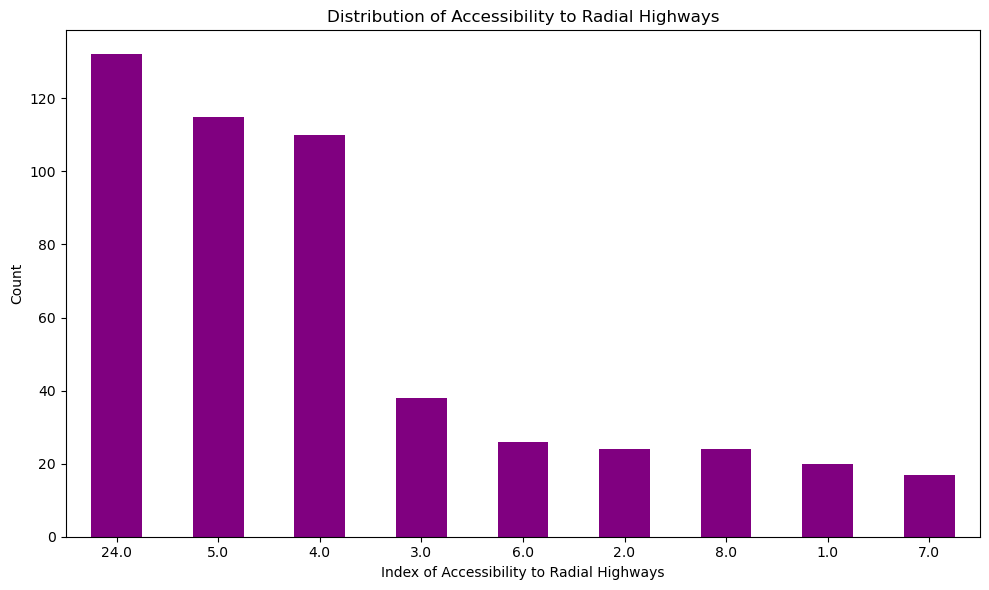

In [28]:
# Plot the distribution of RAD
plt.figure(figsize=(10, 6))
df['RAD'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Index of Accessibility to Radial Highways')
plt.ylabel('Count')
plt.title('Distribution of Accessibility to Radial Highways')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.tight_layout()  # Adjust the layout to fit the labels

In [32]:
#feature 8: TAX      full-value property-tax rate per $10,000

# Convert TAX to float and describe
df['TAX'] = df['TAX'].astype(float)
tax_stats = df['TAX'].describe()



Text(0, 0.5, 'Frequency')

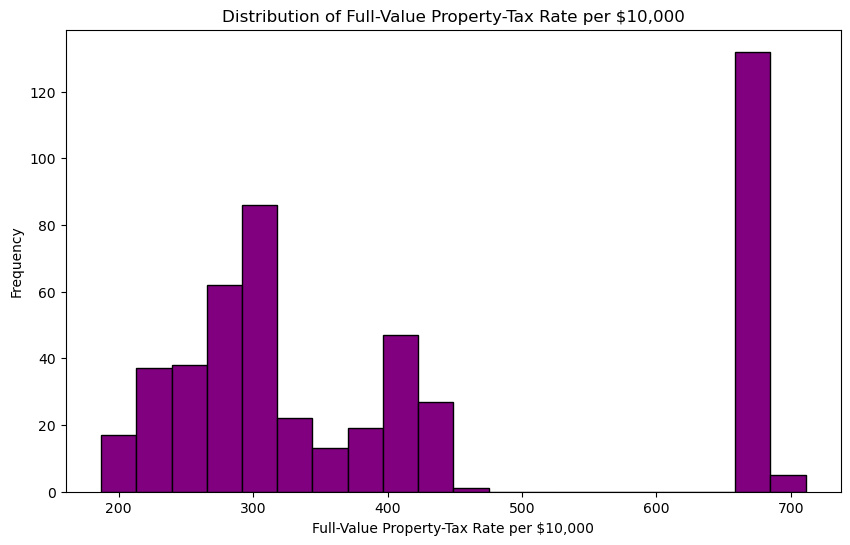

In [33]:
# Plot the histogram for TAX
plt.figure(figsize=(10, 6))
plt.hist(df['TAX'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Full-Value Property-Tax Rate per $10,000')
plt.xlabel('Full-Value Property-Tax Rate per $10,000')
plt.ylabel('Frequency')


In [ ]:
#feature 8: PTRATIO  pupil-teacher ratio by town

In [34]:
# Convert PTRATIO to numeric
df['PTRATIO'] = pd.to_numeric(df['PTRATIO'], errors='coerce')

# Generate descriptive statistics for 'PTRATIO'
ptratio_stats = df['PTRATIO'].describe()


In [36]:
df.head(), df['PTRATIO'].dtype

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 
    PTRATIO       B  LSTAT  MEDV  
 0     15.3  396.90   4.98  24.0  
 1     17.8  396.90   9.14  21.6  
 2     17.8  392.83   4.03  34.7  
 3     18.7  394.63   2.94  33.4  
 4     18.7  396.90   5.33  36.2  ,
 dtype('float64'))

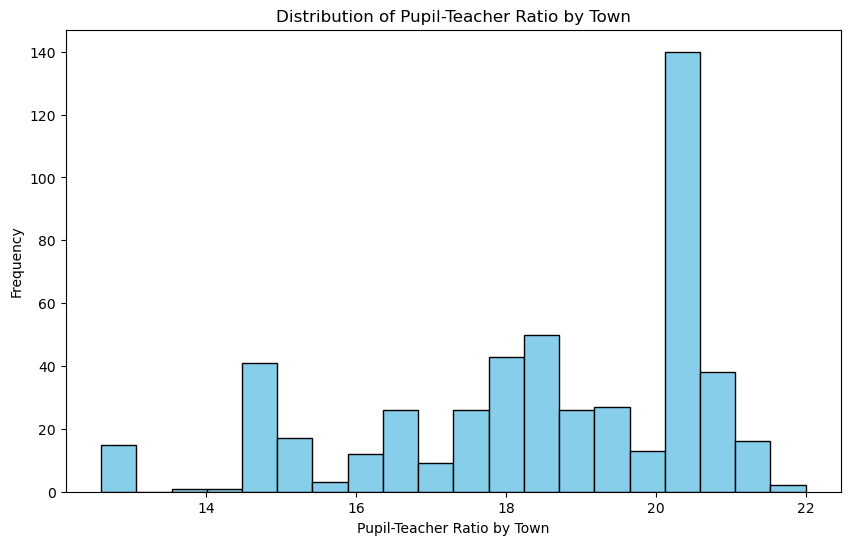

In [35]:
# Plot the histogram for the 'PTRATIO' feature
plt.figure(figsize=(10, 6))
plt.hist(df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# feature 9 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

In [37]:
df['B'] = pd.to_numeric(df['B'], errors='coerce')

b_stats = df['B'].describe()

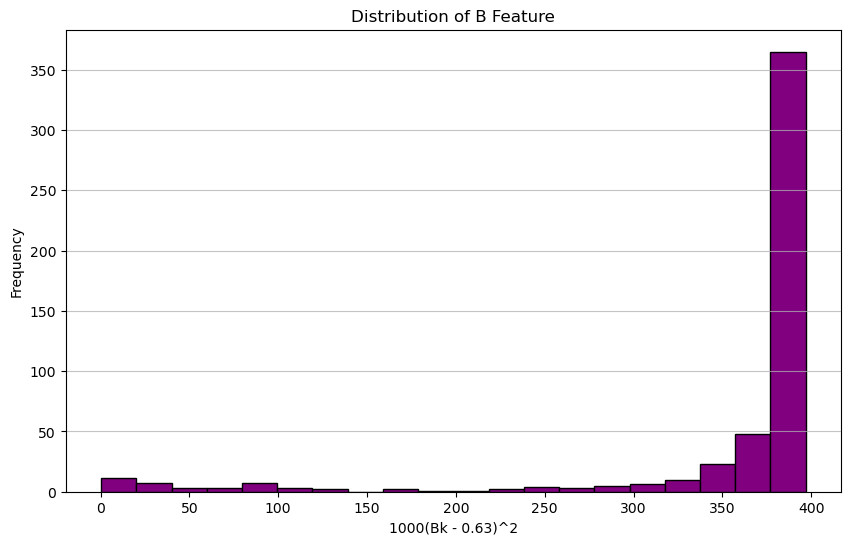

In [38]:
# Plotting the histogram for the 'B' feature
plt.figure(figsize=(10, 6))
plt.hist(df['B'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of B Feature')
plt.xlabel('1000(Bk - 0.63)^2')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
#feat 10 : PTRATIO  pupil-teacher ratio by town

In [42]:
# Convert the 'PTRATIO' column to a numeric type
df['PTRATIO'] = pd.to_numeric(df['PTRATIO'], errors='coerce')

# Get descriptive statistics
ptratio_stats = df['PTRATIO'].describe()

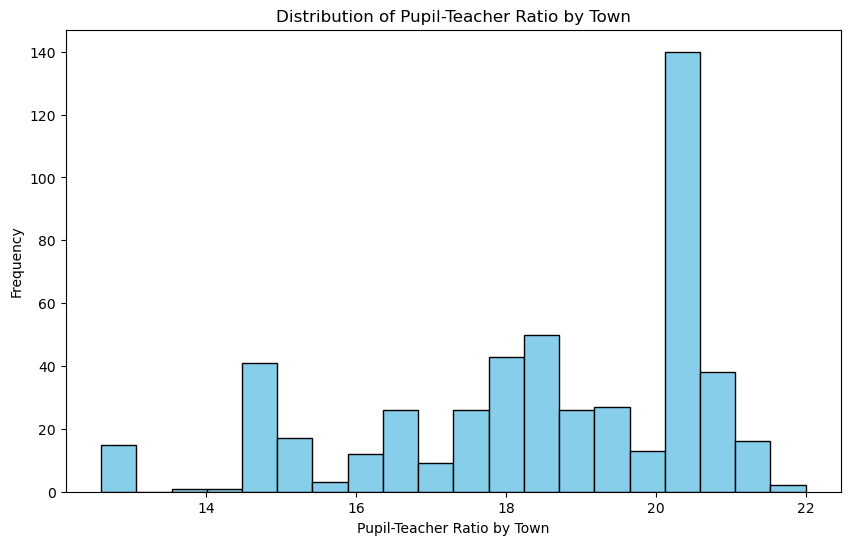

In [43]:
# Plot the histogram for the 'PTRATIO' feature
plt.figure(figsize=(10, 6))
plt.hist(df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Pupil-Teacher Ratio by Town')
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#feat 11 LSTAT    % lower status of the population
# Convert the 'LSTAT' column to a numeric type
df['LSTAT'] = pd.to_numeric(df['LSTAT'], errors='coerce')

# Get descriptive statistics
lstat_stats = df['LSTAT'].describe()


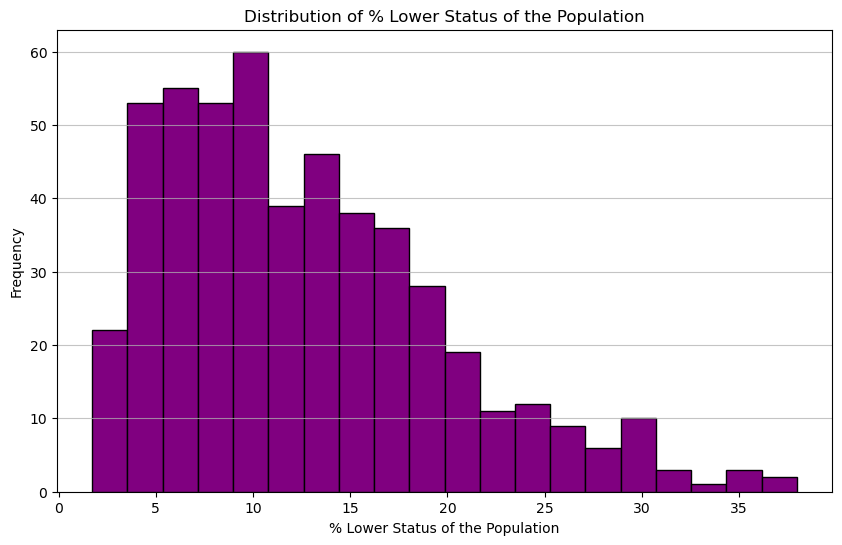

In [41]:
# Plot the distribution of the 'LSTAT' feature
plt.figure(figsize=(10, 6))
plt.hist(df['LSTAT'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of % Lower Status of the Population')
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [44]:
#feat 12MEDV     Median value of owner-occupied homes in $1000's
# Convert 'MEDV' to numeric type since it represents the Median value of owner-occupied homes
df['MEDV'] = pd.to_numeric(df['MEDV'], errors='coerce')

# Generated descriptive statistics for 'MEDV'
medv_stats = df['MEDV'].describe()


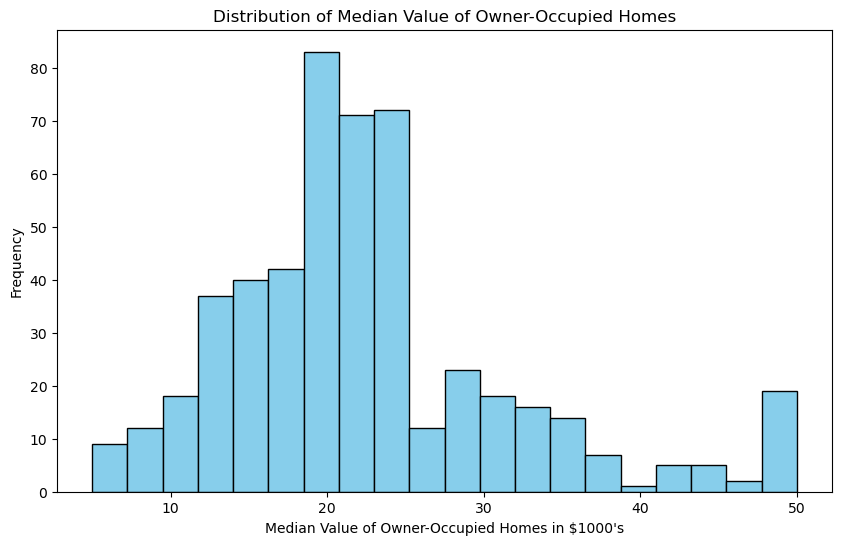

In [45]:
# Plot the histogram for the 'MEDV' feature
plt.figure(figsize=(10, 6))
plt.hist(df['MEDV'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value of Owner-Occupied Homes in $1000\'s')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#machine learning

In [87]:
# !pip install numpy pandas scikit-learn matplotlib seaborn


In [88]:
# pip install -U scikit-learn


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [68]:


#not able to update newer version

def create_poly_feature_names(features):
    #  feature names
    n_features = len(features)
    poly_features_names = []

    # Generate interaction terms names
    for i in range(n_features):
        for j in range(i, n_features):
            poly_features_names.append(f"{features[i]}_{features[j]}")
    
    # Include squared terms names
    for feature in features:
        poly_features_names.append(f"{feature}^2")
    
    # Correct the total number of feature names to match the poly_features shape
    total_features = ['1'] + features + poly_features_names
    return total_features[:104]  # Adjust the slice to match the actual number of features in poly_features

# Adjust DataFrame creation to match the correct number of columns
df_poly = pd.DataFrame(poly_features, columns=create_poly_feature_names(features))
print(df_poly.head())


          1      CRIM        ZN     INDUS      CHAS       NOX        RM  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        AGE       DIS       RAD  ...  RAD_LSTAT   TAX_TAX  TAX_PTRATIO  \
0  0.140214 -0.982843 -0.666608  ...   0.444367  0.972582    -0.294009   
1  0.557160 -0.867883 -0.987329  ...   0.974820  0.299254    -0.435464   
2  0.557160 -0.867883 -0.987329  ...   0.974820  0.299254    -0.391404   
3  1.077737 -0.752922 -1.106115  ...   1.223491 -0.125027    -0.460324   
4  1.077737 -0.752922 -1.106115  ...   1.223491 -0.125027    -0.487854   

      TAX_B  TAX_LSTAT  PTRATIO_PTRATIO  PTRATIO_B  PTRATIO_LSTAT       B_B  \
0  0.716979   2.128682   

In [60]:
X = df_poly  # Using polynomial features
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [62]:
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.2f}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"CV MSE: {np.mean(-cv_scores):.2f}")


Mean Squared Error: 14.26
R-squared: 0.81
CV MSE: 24640817765269465118801920.00


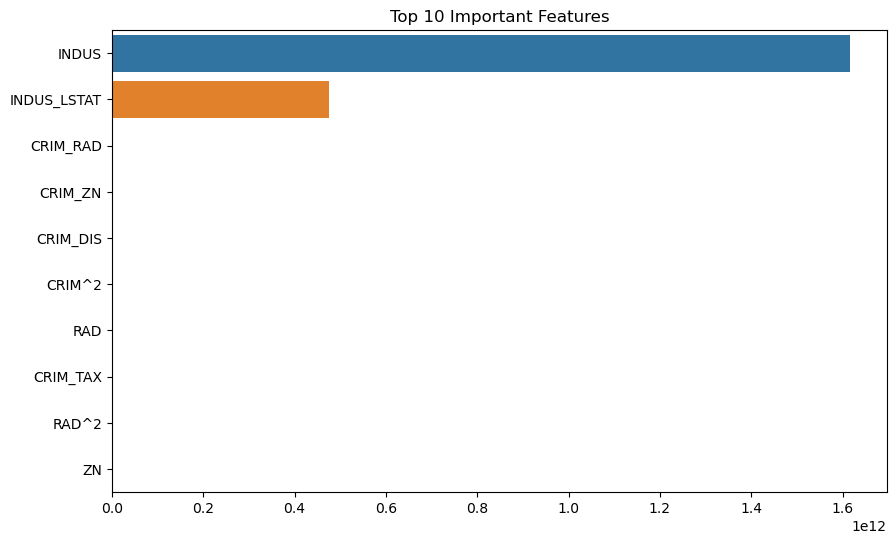

In [64]:
# Ensure that poly_feature_names is the correct length
if len(poly_feature_names) != len(model.coef_):
    # Adjust poly_feature_names to match the model coefficients
    corrected_poly_feature_names = poly_feature_names[:len(model.coef_)]

    # Now create the series with the corrected names
    feature_importance = pd.Series(index=corrected_poly_feature_names, data=np.abs(model.coef_))
else:
    # If the lengths match, proceed as before
    feature_importance = pd.Series(index=poly_feature_names, data=np.abs(model.coef_))

top_features = feature_importance.nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Important Features')
plt.show()


In [65]:
from sklearn.decomposition import PCA


In [71]:


# Normalize features
scaler = StandardScaler()
features = [col for col in df.columns if col != 'MEDV']  # Exclude the target variable
df_scaled = scaler.fit_transform(df[features])

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_scaled)

# Correctly get feature names for newer versions of scikit-learn
if hasattr(poly, 'get_feature_names_out'):
    # Use the correct function for newer versions
    poly_feature_names = poly.get_feature_names_out()
else:
    # Fallback for older versions of scikit-learn, adjust if necessary based on your version
    poly_feature_names = ['x%d' % i for i in range(poly_features.shape[1])]

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
poly_features_pca = pca.fit_transform(poly_features)

# Check the number of components
print(f"Reduced to {pca.n_components_} features from {poly_features.shape[1]}.")

# Now poly_feature_names needs adjustment  after PCA since PCA creates new components
# without a direct correspondence to the original feature names



Reduced to 25 features from 104.


In [72]:
X = poly_features_pca
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


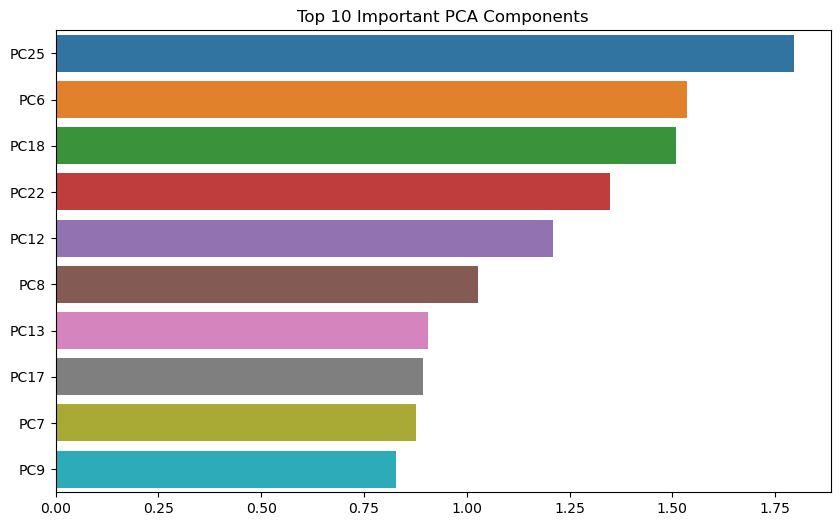

In [73]:
#  linear regression model
model.fit(X_train, y_train)

# Feature importance in PCA context
component_importance = pd.Series(data=np.abs(model.coef_), index=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
top_components = component_importance.nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_components.values, y=top_components.index)
plt.title('Top 10 Important PCA Components')
plt.show()


In [74]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Example: Assuming `df` is your DataFrame and it has a time series index
# Target variable for forecasting
target = 'MEDV'

# Check for stationarity
result = adfuller(df[target])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If p-value > 0.05, we proceed with differencing because the series is not stationary
if result[1] > 0.05:
    df[target] = df[target].diff().dropna()

# Define the ARIMA model
# Note: You will need to choose the order (p,d,q) based on your dataset. This is just an example.
model = ARIMA(df[target], order=(5,1,0))

# Fit the model
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=5)  # Forecast the next 5 periods
print(forecast)


ADF Statistic: -3.381872
p-value: 0.011593
506    14.920129
507    17.499894
508    17.460500
509    16.926199
510    17.076047
Name: predicted_mean, dtype: float64


ADF Statistic: -3.3818719507985615
p-value: 0.011592599233012823
506    14.920129
507    17.499894
508    17.460500
509    16.926199
510    17.076047
Name: predicted_mean, dtype: float64


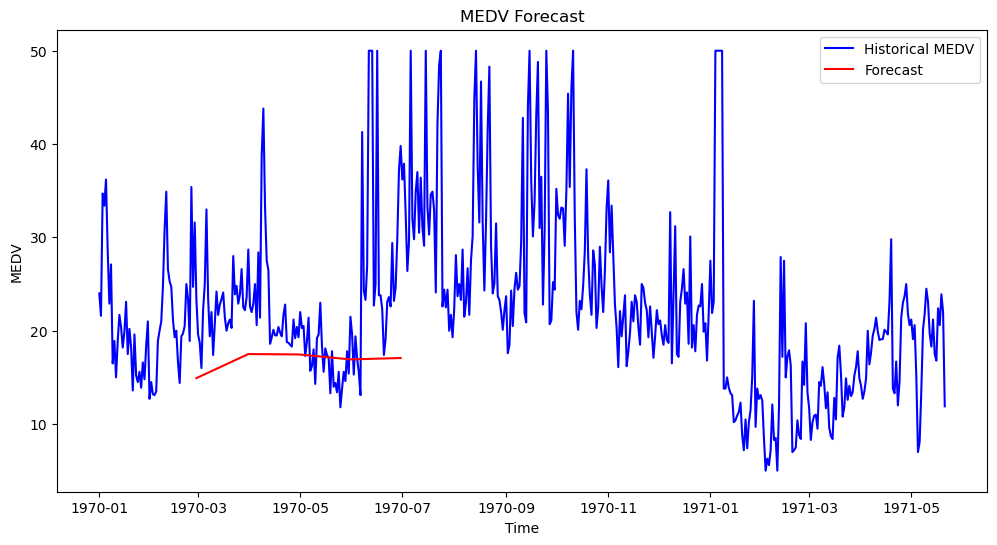

In [78]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


# Assuming `df` is your DataFrame and it has a DateTimeIndex
# Target variable for forecasting
target = 'MEDV'

# Check for stationarity
result = adfuller(df[target].dropna())  # Ensure to drop NaN values for the test
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p-value > 0.05, differencing is needed to make the series stationary
if result[1] > 0.05:
    df[target] = df[target].diff().dropna()

# Define the ARIMA model
# Note: You need to choose the order (p,d,q) based on your dataset specifics. This is just an example.
model = ARIMA(df[target], order=(5,1,0))

# Fit the model
model_fit = model.fit()

# Forecast the next 5 periods
forecast = model_fit.forecast(steps=5)
print(forecast)

# Plot the historical and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df[target], label='Historical MEDV', color='blue')

# Generate a new index for the forecast period
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date, periods=len(forecast) + 1, freq='M')[1:]  # Adjust freq as necessary

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('MEDV Forecast')
plt.xlabel('Time')
plt.ylabel('MEDV')
plt.legend()
plt.show()


In [ ]:
#categorical matrix

In [83]:

#demonstration of one-hot encoding process
df_encoded = pd.get_dummies(df, columns=['CHAS'], drop_first=True, prefix='CHAS')


In [80]:
print(df_encoded.head())


       CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   

        RAD       TAX   PTRATIO         B     LSTAT  MEDV  \
0 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  24.0   
1 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  21.6   
2 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  34.7   
3 -0.752922 -1.106115  0.113032  0.416163 -1.361517  33.4   
4 -0.752922 -1.106115  0.113032  0.441052 -1.026501  36.2   

   CHAS_3.6683978597124467  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  


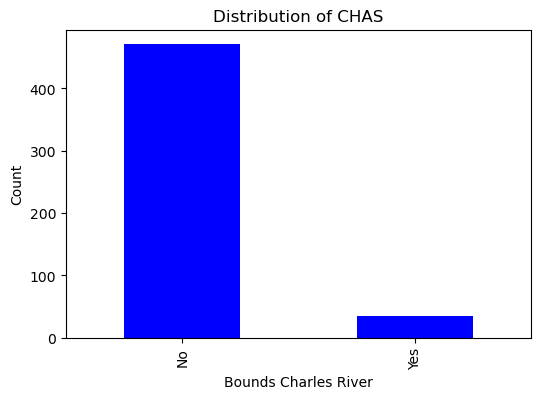

In [86]:
 #representing whether properties are close to the Charles River or not
# Convert CHAS to a categorical type with categories as 0 and 1
df['CHAS'] = df['CHAS'].astype('category')

# Plot the distribution of CHAS
plt.figure(figsize=(6, 4))
df['CHAS'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Bounds Charles River')
plt.ylabel('Count')
plt.title('Distribution of CHAS')
plt.xticks([0, 1], ['No', 'Yes'])  # Assuming 0 = No, 1 = Yes
plt.show()

In [ ]:
#i can use linear regression as forecasting- as for my research lr is the most popular

#forecasting real estate, real estate engineer, talk about notebook , interpretation in the notebook, forecasting notebook as an example

In [ ]:
#asking for one model as forecasting - mention ARIMA model as my next step 

In [ ]:
#give one example of popular model-the best model they use, the matrix they model 